# Artifical Intelligence

**Python** is the preferred programming language of *Artificial Intelligence (AI)* and *Machine Learning (ML)*.

Central packages are:

1. [scikit-learn](https://scikit-learn.org/stable/): Machine learning algorithms.
1. [PyTorch](): Deep learning (orignally developed by Meta).
1. [jax](https://docs.jax.dev/en/latest/): Deep learning (developed by Google).

**Today:** I will give you a glimpse of what you can start learning based on what you already know. (*No questions on this for the exam*)

**What is Artifical Intelligence (AI)?** AI is broad field of building machines and computers that have the ability to mimic cognitive functions associated with human intelligence.

1. **Symbolic:** Use logic to e.g. prove mathematical propositions. Deductive.

1. **Quantitative:** Learn patterns from data. Inductive.


**What is Machine Learning (ML)?** ML is a subset of AI focused on using algorithms to analyze large amounts of data.

1. **Supervised machine learning:** Prediction and forecasting from training data with pre-specified target. Like a highly flexible form of regression (e.g. regression tree).

1. **Unsupervised machine learning:** Discovering unspecified patterns in training data (e.g. k-means clustering).

1. **Reinforcement learning:** Discovering desirable behavior in real-time in an unknown environment (e.g. in robotics, generalization of dynamic optimization from last lecture) 


**Two fundamental tools:**

1. **Automatic differentiation:** Keep track of mathematical functions used to automatically get derivative.

1. **Neural networks:** A very flexible kind of function.

**Table of contents**<a id='toc0_'></a>    
- 1. [Regression trees](#toc1_)    
- 2. [K-means clustering](#toc2_)    
- 3. [Automatic differentiation](#toc3_)    
- 4. [(Deep) Neural Network](#toc4_)    
- 5. [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [5]:
%pip install torch

ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch
Note: you may need to restart the kernel to use updated packages.


In [8]:
# small hack due to warning with k-means
import os
os.environ["OMP_NUM_THREADS"] = '2'

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

# scikit-learn imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# PyTorch import
# import torch

In [9]:
rng = np.random.default_rng(0)

## 1. <a id='toc1_'></a>[Regression trees](#toc0_)

A **regression tree** is a machine-learning method used to predict a numerical outcome $y=f(X)$ from input variables $X = (x_1,x_2,\dots,x_n)$.

The **training data** is pairs of $X_i$ and $y_i$ for each observed unit.

It works by **splitting the data into smaller and smaller groups** based on the value of input variables.

1. Start with all data in one group
1. The algorithm searches for a split (e.g., size < 130) that best separates the data into two groups with more similar outcomes
1. It repeats this process in each new group until the groups are small or very similar
1. Each final group is called a leaf. The prediction is the average outcome of the training data in that leaf

Each split is of the form:

$$
G_1(j, s) = \{ X : x_j < s \}, \qquad
G_2(j, s) = \{ X : x_j \ge s \},
$$

for some feature $ j $ and threshold $ s $.

The best split $(j, s)$ is chosen to minimize the **sum of squared errors (SSE)**:

$$
\min_{j,s}
\left[
\sum_{i : X_i \in G_1(j,s)} (y_i - \bar{y}_{G_1})^2
+
\sum_{i : X_i \in G_2(j,s)} (y_i - \bar{y}_{G_2})^2
\right],
$$

where $ \bar{y}_{G_k} $ is the mean of $ y $ in group $ G_k $.

Each final group (leaf) gives a constant prediction:

$$
\hat{f}(X) = \bar{y}_{G_m} \quad \text{if } X \in G_m.
$$


Create some synthetic training data of houses with size, distance to city center and price.

In [10]:
# a. grid of sizes and distances
sizes = np.array([60, 80, 100, 120, 140, 160, 180, 200])
distances = np.array([1, 5, 10, 15])

# b. data generation
data = []
for s in sizes:
    for d in distances:
        
        # i. true underlying relationship (unknown to the tree)
        base_price = 100 + 1.8 * s - 4 * d

        # ii. add noise so fit is not perfect        
        noise = np.random.normal(0, 15)
        price = base_price + noise

        data.append((s,d,price))

# c. create DataFrame
df = pd.DataFrame(data,columns=['size', 'distance', 'price'])
df.sample(10)

,size,distance,price
11,100,15,216.031149
14,120,10,279.038883
5,80,5,198.514186
30,200,10,436.443237
17,140,5,331.240532
25,180,5,367.253098
16,140,1,329.742646
13,120,5,313.448482
6,80,10,183.396846
19,140,15,319.099171


Fit a regression tree.

In [11]:
X = df[['size','distance']]
y = df['price']

# moderate depth so it captures patterns but does not overfit perfectly
tree = DecisionTreeRegressor(max_depth=3,random_state=0)
tree.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=0)

Visualize the tree structure.

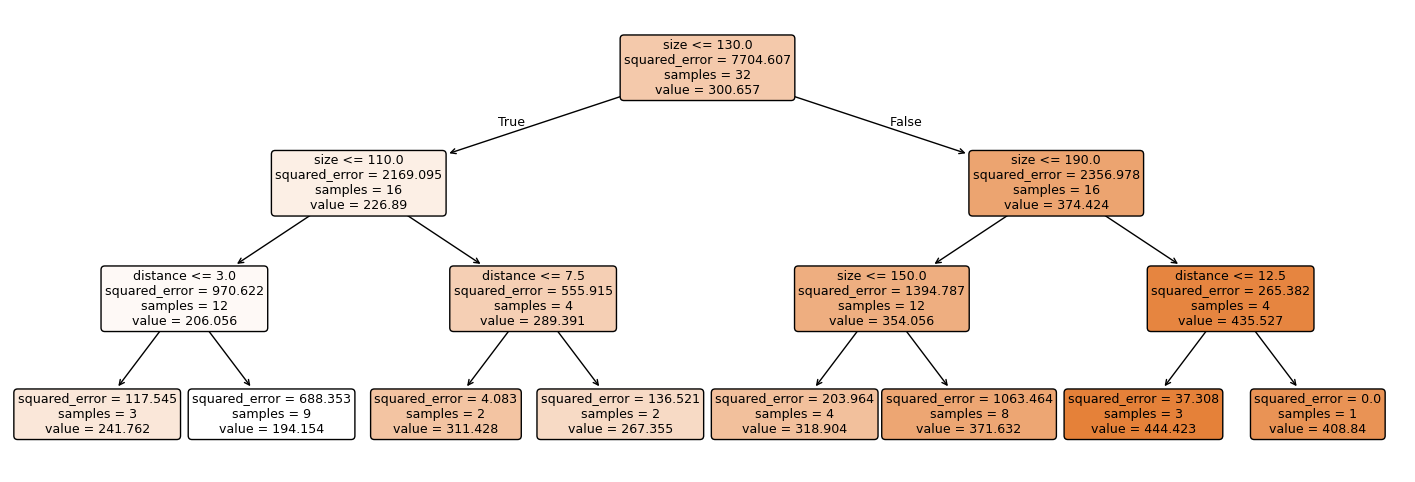

In [12]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plot_tree(tree,
          feature_names=['size','distance'],
          filled=True,
          rounded=True,
          ax=ax);

We compare the **actual** prices to the **predicted** prices for the training data.

If the tree fit were perfect, all points would lie on the 45-degree line.

Here, because we added noise and limit tree depth, points deviate from that line.

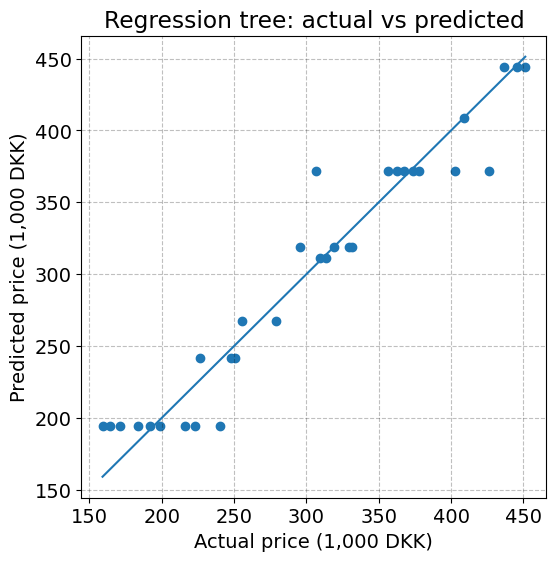

In [13]:
y_pred = tree.predict(X)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y, y_pred)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
ax.plot([min_val, max_val], [min_val, max_val])  # 45-degree line
ax.set_xlabel('Actual price (1,000 DKK)')
ax.set_ylabel('Predicted price (1,000 DKK)')
ax.set_title('Regression tree: actual vs predicted');

**Danger of supervised machine learning with lots of parameters:**

1. Overfitting (i.e. fit noise instead of actual function)
2. Local minima (i.e. don't find the global optimum)

**Solutions:**

1. Fit on only some of the data, validate on the rest
1. Average over many smaller prediction models (random forrest of trees)
1. Introduce randomness (shuffle training data, stochastic gradient descent) 

**Bottom-line:** *Works extremely well in practice if well-done and if a lot of data is availiable.*

One downside is that the pre-diction model quickly becomes a black box.

## 2. <a id='toc2_'></a>[K-means clustering](#toc0_)

The **K-means algorithm** clusters data by trying to separate samples in $K$ groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

The K-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

$$
\sum_{i=0}^n \min_{\mu_j \in C} |x_i-\mu_j|^2
$$

Generate synthetic 2D trainng data.

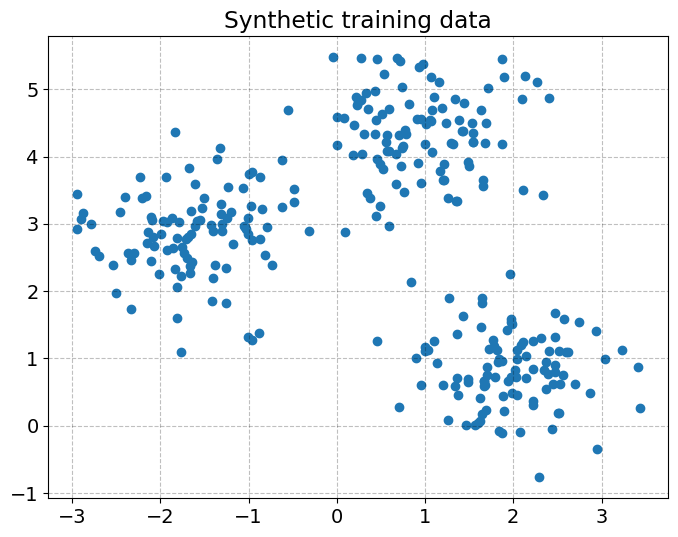

In [14]:
X,y_true = make_blobs(n_samples=300,centers=3,cluster_std=0.60,random_state=0)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0],X[:,1])
ax.set_title("Synthetic training data");

Fit KMeans.

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster centers:")
centroids

Cluster centers:


array([[ 1.95159369,  0.83467497],
       [-1.62528103,  2.85866798],
       [ 0.94768845,  4.35742647]])

Plot clusters and centroids:

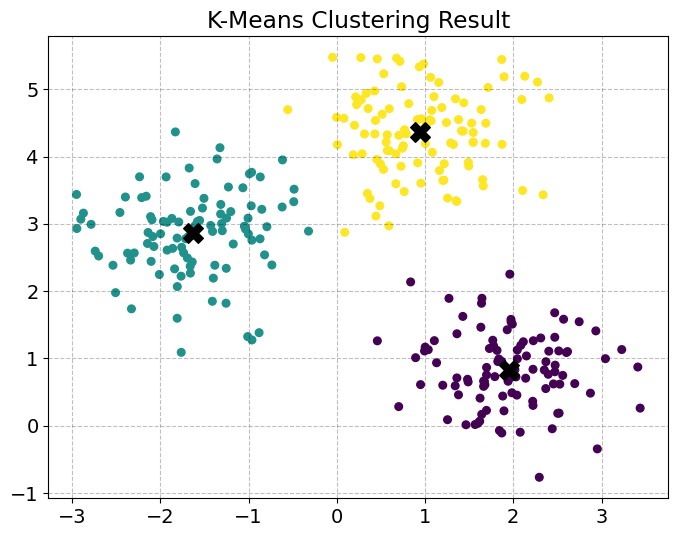

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], X[:,1], c=labels, s=30)
ax.scatter(centroids[:,0], centroids[:,1], c='black', s=200, marker='X')
ax.set_title("K-Means Clustering Result");

## 3. <a id='toc3_'></a>[Automatic differentiation](#toc0_)

**PyTorch** features **automatic differentiation** which computes derivatives of functions through **back-propagation**. 

Instead of `np.array`, torch has `torch.tensor`.

In [17]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.log(x)
print(y)

NameError: name 'torch' is not defined

Derivatives can be found as follows:

$$
\begin{align*}
f(x) &= (x^2 + 1) + 2x \\
f^{\prime}(x) &= 2x+2
\end{align*}
$$

In [18]:
x = torch.tensor([2.0],requires_grad=True) # leaf
z = x**2 + 1 # intermediary node
y = z + 2*x # root

y.backward() # automatic differentiation (from leaf to root)

print(f'{x = }') # -> tensor([2.0])
print(f'{x.grad = }') # tensor([6.0])

NameError: name 'torch' is not defined

We can look at the computational tree:

In [19]:
def print_graph(fn, indent=0):
    print(' ' * indent, fn)
    for child, _ in fn.next_functions:
        if child is not None:
            print_graph(child, indent + 4)
            
print_graph(y.grad_fn)

AttributeError: 'Series' object has no attribute 'grad_fn'

## 4. <a id='toc4_'></a>[(Deep) Neural Network](#toc0_)

The neural network is structured into a series of **layers**: An input layer, an output layer and a series of hidden layers. A neural network is called *deep* when there is more than one hidden layer

Each of these layers is characterized by its number of **neurons**. 

In the input- and output layers the number of neurons equal $N$ and $M$ respectively. 

In the hidden-layers, the number of neurons is a hyperparameter chosen by the user, here called $K_{l}$ for the $l$'th layer. 

Each layer has a non-linear **activation function** $\sigma_{l}:\mathbb{R}\rightarrow\mathbb{R}$. The typical choice of $\sigma_{\ell}$ is the rectified linear unit (ReLU): 

$$
\sigma(z)=\max(0,z)
$$

The final activation function $\sigma_{L+1}$ can be used to limit the output space of the neural net. If it is ReLU, the neural network can only output non-negative values.

The mapping of a neural network with $L$ hidden layers where $X=[x_{0},\dots x_{N-1}]$ is the input vector, is

$$
\begin{align*}
a_{i}^{1}	&=\sigma_{1}\left(\sum_{j=0}^{N-1}w_{i,j}^{1}x_{j}+b_{i}^{1}\right)\,\,\,i\in[0,\dots K_{1}-1]\Big)\\
a_{i}^{2}	&=\sigma_{2}\left(\sum_{j=0}^{K_{1}-1}w_{i,j}^{2}a_{j}^{1}+b_{i}^{2}\right)\,\,\,i\in[0,\dots K_{2}-1]\Big) \\
	& \vdots \\
a_{i}^{L}	&=\sigma_{L}\left(\sum_{j=0}^{K_{L-1}-1}w_{i,j}^{L}a_{j}^{L-1}+b_{i}^{L-1}\right)\,\,\,i\in[0,\dots K_{L}-1]\Big) \\
y_{i}=a_{i}^{L+1}	&=\sigma_{L+1}\left(\sum_{j=0}^{M-1}w_{i,j}^{L+1}a_{j}^{L}+b_{i}^{L}\right)\,\,\,i\in[0,\dots M-1]\Big) \\
\end{align*}
$$

where $w_{i,j}^{l}$ is the weights in layer l mapping to neuron i in the layer and is coefficient to input j for the former layer. $b_{i}^{l}$ is a constant in layer l mapping to neuron i and is called a bias. Together, we define the parameters of the neural network as $\theta=\left\{  \left\{  w_{i,j}^{l}\right\}  ,\left\{  b_{i}^{l}\right\}  \right\}$.

<img src='NN.png' style='width:50%;'>

Following Hornik et al. (1989) a number of universal function approximation theorems exist for the feedforward neural network structure used here. Results exists even for non-smooth and non-continuous functions (i.e. 'local features'), which for example, polynomials have problems fitting. It is also generally believed that oscillation problems when interpolating and extrapolating are smaller with neural networks than with polynomials.

Create neural network with two hidden layers.

In [20]:
class NN(torch.nn.Module):
	def __init__(self):

		super(NN, self).__init__()
		self.layers =  torch.nn.ModuleList([None]*4)    
		self.layers[0] = torch.nn.Linear(1,100)
		self.layers[1] = torch.nn.Linear(100,100)
		self.layers[2] = torch.nn.Linear(100,100)
		self.layers[3] = torch.nn.Linear(100,1)

	def forward(self,x):

		x = torch.nn.functional.relu(self.layers[0](x))
		x = torch.nn.functional.relu(self.layers[1](x))
		x = torch.nn.functional.relu(self.layers[2](x))
		return self.layers[3](x)

NameError: name 'torch' is not defined

Create an instance and connect an optimizers.

In [14]:
f_NN = NN() 
opt = torch.optim.Adam(f_NN.parameters(),lr=1e-3)

Train to fit a sin-function.

In [15]:
torch.manual_seed(0)
fac = 2*3.14
K = 1000
for k in range(K): # given sample

    # draw from -fac to fac
    x = (2*torch.rand(size=(10,1))-1)*fac
    y = torch.sin(x)

    # b. prediction
    opt.zero_grad() # zero gradients
    pred_y = f_NN(x) # forward pass

    # c. loss computation
    loss = torch.mean((pred_y-y)**2) # calculate loss 
    if k%100 == 0: print(f'{k = :5d}: loss = {loss.item():.1e}')   

    # d. backpropagation and optimization step
    loss.backward() # backward pass
    opt.step() # optimization step

k =     0: loss = 6.1e-01
k =   100: loss = 2.0e-01
k =   200: loss = 2.3e-02
k =   300: loss = 4.8e-02
k =   400: loss = 5.4e-02
k =   500: loss = 2.2e-02
k =   600: loss = 1.3e-01
k =   700: loss = 6.2e-03
k =   800: loss = 5.9e-03
k =   900: loss = 1.9e-03


Plot the fit.

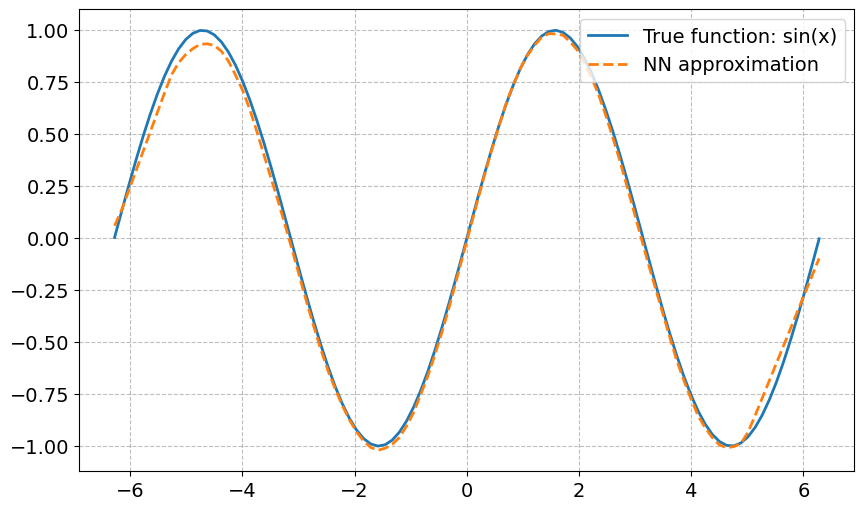

In [16]:
X = np.linspace(-fac,fac,100).reshape(-1,1)
X = torch.tensor(X,dtype=torch.float32)
Y_true = torch.sin(X).numpy()
Y_approx = f_NN(X).detach().numpy()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X.numpy(),Y_true,lw=2,label='True function: sin(x)')
ax.plot(X.numpy(),Y_approx,ls='--',lw=2,label='NN approximation')
ax.legend();

**Neural networks comes in many flavors**. A version called *transformers* are used in Large Language Models (LLMs) such as ChatGPT.

I use them to solve high-dimensional economic models. Python package: [EconDLSolvers](https://github.com/NumEconCopenhagen/EconDLSolvers).

## 5. <a id='toc5_'></a>[Summary](#toc0_)

**Intended takeaway:** The basic of AI is not that mysterious. For example: Regression trees and neural networks are fundamentally just functions.

*You can begin learning AI and ML if you want to*.

**Course for machine learning:** [AI for Humanity: Machine Decisions, Learning and Societal Consequences](https://kurser.ku.dk/course/a%c3%98kk08446u). 

Teaches you state-of-the-art machine-learning methods their practical and methodological applications, and their societal consequences.

More technical courses are also availiable at math and computer science.

**Future:** AI will be central part of the computational courses in economics.